*Note*: This is a supplementary analysis using dimensionality reduction on the cellular analysis data.

In [1]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phenograph
import numpy as np
import colorcet as cc
np.random.seed(2019)

In [2]:
cells = pd.read_csv("../data/AllCells.csv")

In [3]:
# Clean up the rough class names that were used for manual annotation
cells["Assigned Class"] = cells["Assigned Class"].replace({
    "Manual T cell": "Manual T Cells",
    "Manual TC cell": "Manual CD8α+ T Cells",
    "Manual TH Cell": "Manual CD4+ T Cells",
    "Manual TC Prolif Cell": "Manual Prolif. CD8α+ T Cells",
    "Manual TH Prolif Cell": "Manual Prolif. CD4+ T Cells",
    "Manual Act Macrophage": "Manual Act. Microglia",
    "Manual Activated Microglia": "Manual Act. Microglia",
    "Manual Macrophage": "Manual Macrophages",
    "Manual Act Macrophage": "Manual Act. Macrophages",
    "Manual A-P-DeMyel MicroGlia": "Manual A-P-DeMyel Microglia",
    "Manual B cell IgL": "Manual B Cells", 
    "Manual B cell IgK": "Manual B Cells",
    "Manual IgK Naive": "Manual Naive B Cells",
    "Manual IgL Naive": "Manual Naive B Cells",
    "Manual B Cell Switched": "Manual Switched Memory B Cells",
    "Manual B Cell Naive": "Manual Naive B Cells",
    "Manual IgK Switched Memory": "Manual Switched Memory B Cells", 
    "Manual IgL Switched Memory": "Manual Switched Memory B Cells",
    "Manual IgL IgM Memory": "Manual IgM+ Memory B Cells",
    "Manual IgK IgM Memory": "Manual IgM+ Memory B Cells",
    "Manual B cell": "Manual B Cells",
    "Manual Myeloid": "Manual Myeloid Cells",
    "Endothelial Cell": "Manual Endothelial Cells",
    "Manual Endothelial Cell": "Manual Endothelial Cells"
})

#### Dimensionality reduction techniques

In [4]:
# Preprocess only intensity columns (ignore DNA)
data = cells.filter(like="Mean") \
            .drop(["Mean DNA_Ir191Di", "Mean DNA_Ir193Di"], axis=1)

# Log transform to remove skewness
data = np.log(data + 1)

# Scale uniformly
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [5]:
%%time
tsne_result = TSNE(
    n_components=2,
    perplexity=30.,
    method="barnes_hut",
    angle=0.5,
    init="pca",
).fit_transform(data_scaled)

Wall time: 4min 48s


In [6]:
%%time
umap_result = umap.UMAP(
    n_neighbors=20,  # local vs global structure
    min_dist=0.1,    # min. distance that points can be (lower = more clustered)
    metric="correlation"
).fit_transform(data_scaled)

c:\users\fuf\.virtualenvs\multiple-sclerosis-imc-analysis-wkqpqdv_\lib\site-packages\umap\rp_tree.py:469: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_angular_tree" failed type inference due to: Invalid use of recursive(type(CPUDispatcher(<function make_angular_tree at 0x000000001CE7C7B8>))) with parameters (array(float32, 2d, F), array(int64, 1d, C), array(int64, 1d, C), int64)
No type info available for recursive(type(CPUDispatcher(<function make_angular_tree at 0x000000001CE7C7B8>))) as a callable.
[1] During: resolving callee type: recursive(type(CPUDispatcher(<function make_angular_tree at 0x000000001CE7C7B8>)))
[2] During: typing of call at c:\users\fuf\.virtualenvs\multiple-sclerosis-imc-analysis-wkqpqdv_\lib\site-packages\umap\rp_tree.py (476)


File "c:\users\fuf\.virtualenvs\multiple-sclerosis-imc-analysis-wkqpqdv_\lib\site-packages\umap\rp_tree.py", line 476:
def make_angular_tree(data, indices, rng_state, leaf_siz

Wall time: 42.8 s


In [7]:
# Join result to original dataframe
tsne_result = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
umap_result = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"])
df = pd.concat([cells, tsne_result, umap_result], axis=1)

In [8]:
df.head()

,Image Name,SubROI,X (um),Y (um),Assigned Class,Mean CD38_Er167Di,Mean CD3_Er170Di,Mean CD45_Sm154Di,Mean CD4_Yb176Di,Mean CD68_Tb159Di,...,Mean Ki_67_Er168Di,Mean NFAT1_Nd143Di,Mean PLP_Pr141Di,Mean TMEM119_Gd155Di,Distance to Vessel (um),Area (um2),TSNE1,TSNE2,UMAP1,UMAP2
0,1_6_Active_9,LesionCore,953.483333,272.700000,Nucleus,0.878517,2.336183,1.548467,0.871783,6.908117,...,0.101933,1.496483,7.202650,2.633900,0.772785,60,59.738125,38.150288,1.287418,-8.770800
1,1_6_Active_9,LesionCore,899.000000,95.500000,Manual CD8α+ T Cells,1.160568,2.492455,1.700886,0.474159,5.646045,...,0.155773,0.163273,12.236091,1.935955,171.423551,44,59.472099,36.248917,1.575528,-8.890024
2,1_6_Active_9,LesionCore,775.005376,201.123656,Nucleus,1.539409,2.278806,1.515247,1.234645,9.948290,...,0.053419,0.608699,8.582979,2.785086,189.176756,93,59.195450,38.452133,1.298361,-8.934755
3,1_6_Active_9,LesionCore,887.500000,266.000000,Manual CD8α+ T Cells,0.997886,3.953091,3.393841,0.745773,13.046045,...,0.081614,0.309409,7.284477,2.233773,61.928300,44,63.289078,39.474159,1.288414,-8.952078
4,1_6_Active_9,LesionCore,707.500000,347.000000,Nucleus,0.930680,2.825460,2.388740,0.615480,6.026340,...,0.176760,0.261940,6.765140,1.011900,250.281953,50,59.777519,35.071541,1.292933,-8.542315


In [9]:
def glasbey(n_colors):
    cm = cc.cm.glasbey_bw_minc_20
    return [cm(val)[:3] for val in np.linspace(0, 1, cm.N)][:n_colors]

manuals = sorted(df["Assigned Class"].unique())
manuals.remove("Nucleus")

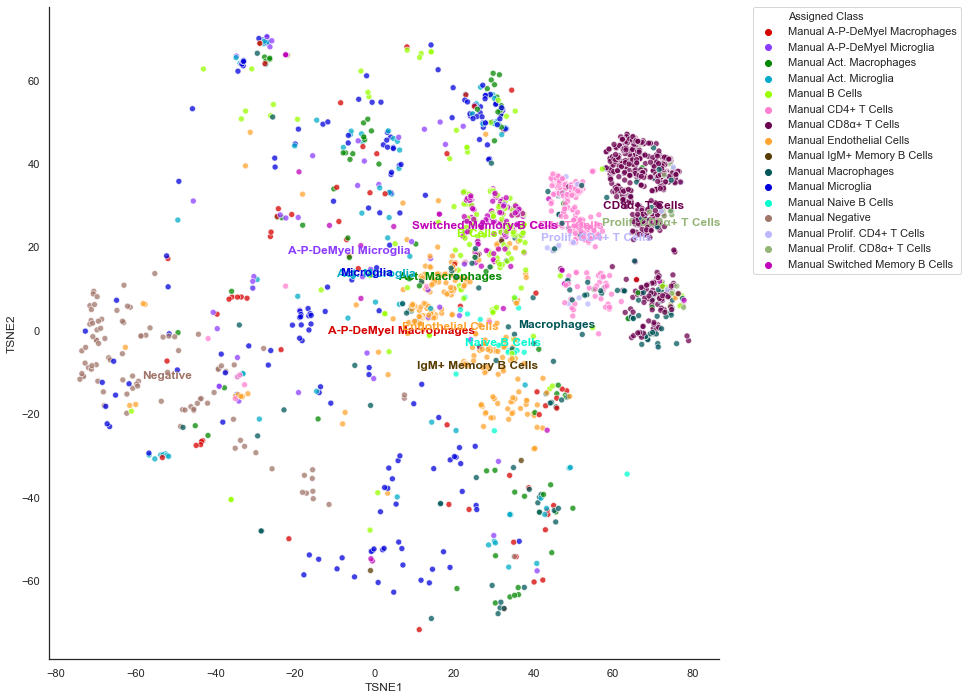

In [10]:
sns.set_style("white")
sns.set_context("notebook")

def plot_manuals(x, y, df, classes):
    f, ax = plt.subplots(figsize=(12, 12))
    sns.scatterplot(
        x=x, y=y, hue="Assigned Class",
        data=df[df["Assigned Class"] != "Nucleus"],
        palette=glasbey(len(classes)), alpha=0.75, hue_order=classes,
        ax=ax
    )
    for i, clss in enumerate(classes):
        ax.annotate(s=clss.split("Manual ")[1],
            xy=df.loc[df["Assigned Class"]==clss, [x, y]].mean(),
            horizontalalignment='center',
            verticalalignment='center',
            size=12, weight='bold',
            color=glasbey(len(classes))[i],
            alpha=1) 
    sns.despine()
    # Move legend outside axis
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plot_manuals("TSNE1", "TSNE2", df, manuals)

In [11]:
id_vars = [col for col in df.columns if not col.startswith("Mean")]
melted = df.melt(id_vars=id_vars, var_name="Marker", value_name="Intensity")
melted["Marker"] = melted["Marker"].str.split("Mean ").str[1]  # Remove "Mean" from start of every marker for brevity
melted.head()

,Image Name,SubROI,X (um),Y (um),Assigned Class,Distance to Vessel (um),Area (um2),TSNE1,TSNE2,UMAP1,UMAP2,Marker,Intensity
0,1_6_Active_9,LesionCore,953.483333,272.700000,Nucleus,0.772785,60,59.738125,38.150288,1.287418,-8.770800,CD38_Er167Di,0.878517
1,1_6_Active_9,LesionCore,899.000000,95.500000,Manual CD8α+ T Cells,171.423551,44,59.472099,36.248917,1.575528,-8.890024,CD38_Er167Di,1.160568
2,1_6_Active_9,LesionCore,775.005376,201.123656,Nucleus,189.176756,93,59.195450,38.452133,1.298361,-8.934755,CD38_Er167Di,1.539409
3,1_6_Active_9,LesionCore,887.500000,266.000000,Manual CD8α+ T Cells,61.928300,44,63.289078,39.474159,1.288414,-8.952078,CD38_Er167Di,0.997886
4,1_6_Active_9,LesionCore,707.500000,347.000000,Nucleus,250.281953,50,59.777519,35.071541,1.292933,-8.542315,CD38_Er167Di,0.930680


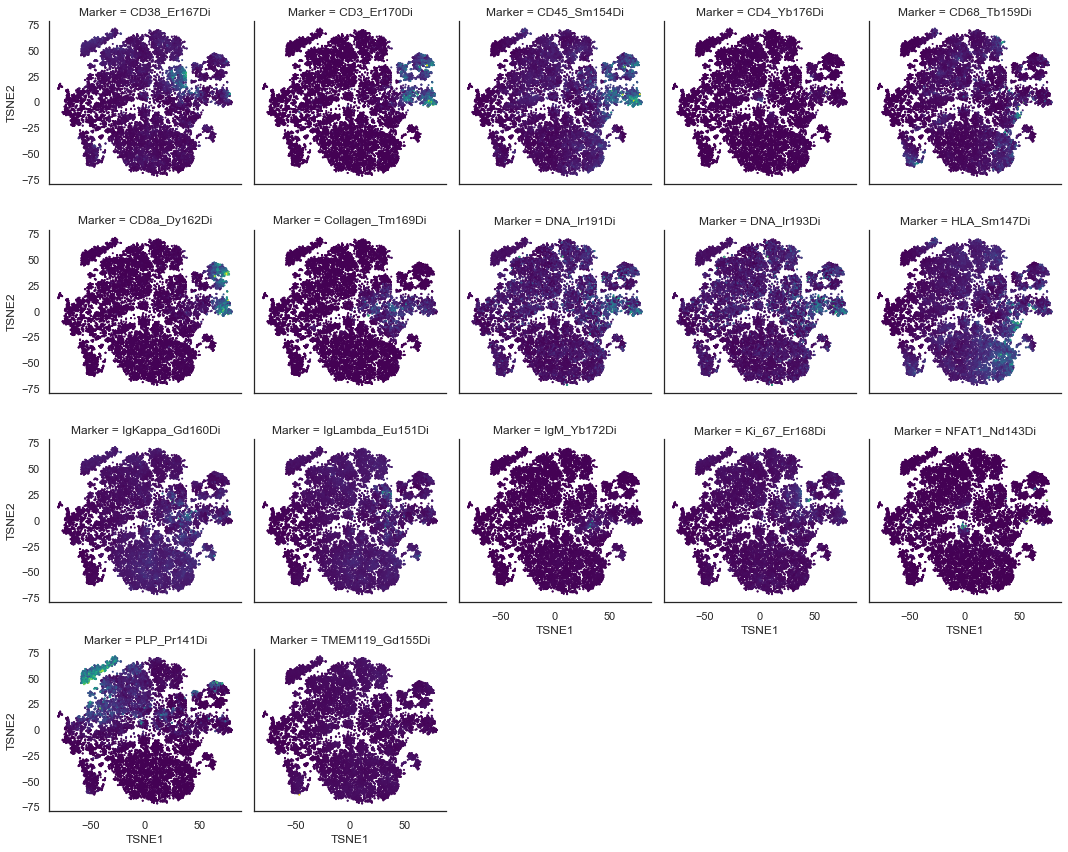

In [12]:
def map_scatter(x, y, c, **kwargs):
    kwargs.pop("color")
    df = kwargs.pop("data")
    plt.scatter(df[x], df[y], c=df[c], **kwargs)

g = sns.FacetGrid(melted, col="Marker", col_wrap=5)
g = g.map_dataframe(
    map_scatter, "TSNE1", "TSNE2", "Intensity", s=1, cmap="viridis", vmin=0
)

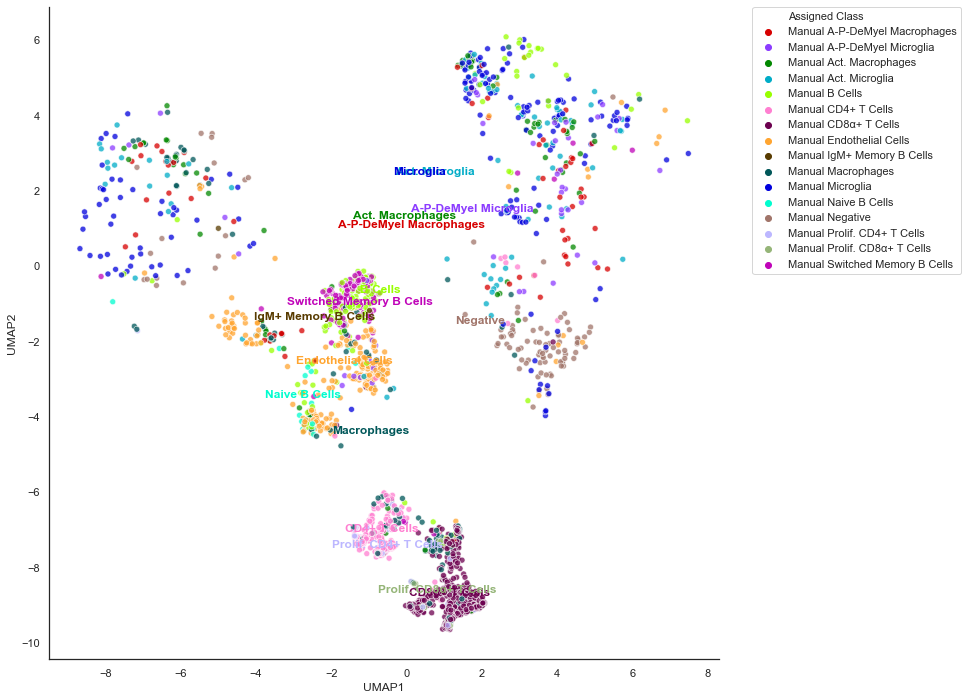

In [13]:
plot_manuals("UMAP1", "UMAP2", df, manuals)

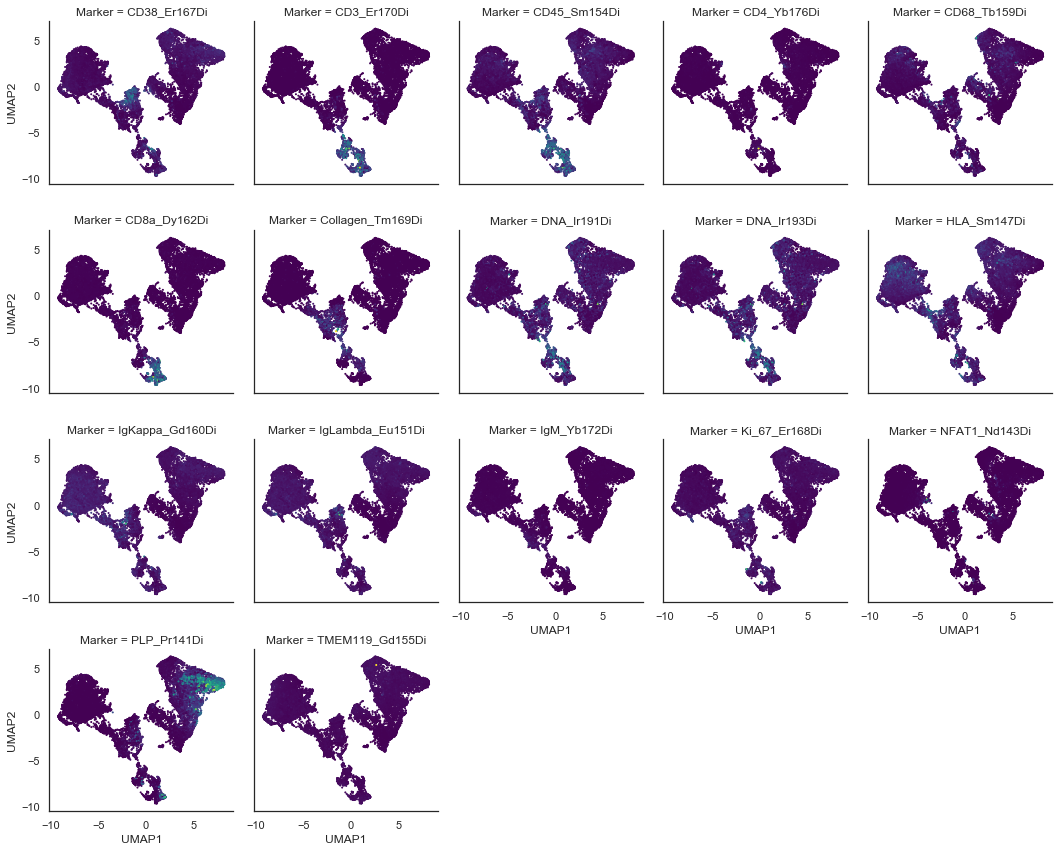

In [14]:
g = sns.FacetGrid(melted, col="Marker", col_wrap=5)
g = g.map_dataframe(
    map_scatter, "UMAP1", "UMAP2", "Intensity", s=1, cmap="viridis", vmin=0
)

#### Apply clustering

In [15]:
communities, graph, Q = phenograph.cluster(data_scaled)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.9042904376983643 seconds
Jaccard graph constructed in 3.870387077331543 seconds
Wrote graph to binary file in 2.480248212814331 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.862344
Louvain completed 21 runs in 324.5264494419098 seconds
PhenoGraph complete in 333.8773844242096 seconds


In [16]:
clusters = pd.DataFrame(communities, columns=["PhenoGraph"])
df = pd.concat([df, clusters], axis=1)

In [17]:
int(clusters.nunique())

27

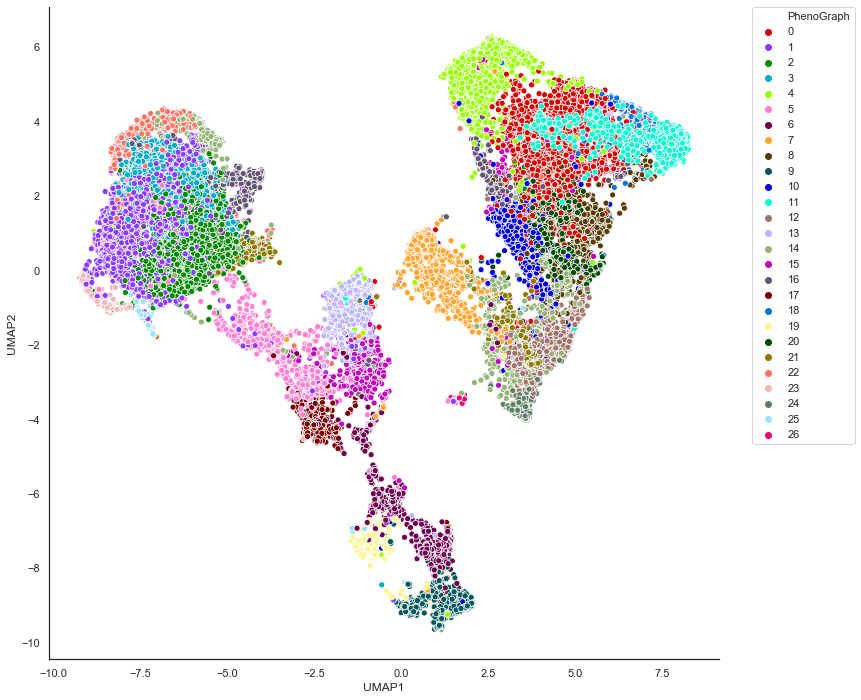

In [18]:
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(
    x="UMAP1", y="UMAP2", hue="PhenoGraph", 
    legend="full", palette=glasbey(int(clusters.nunique())),
    data=df,
    ax=ax
)
sns.despine()
# Move legend outside axis
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

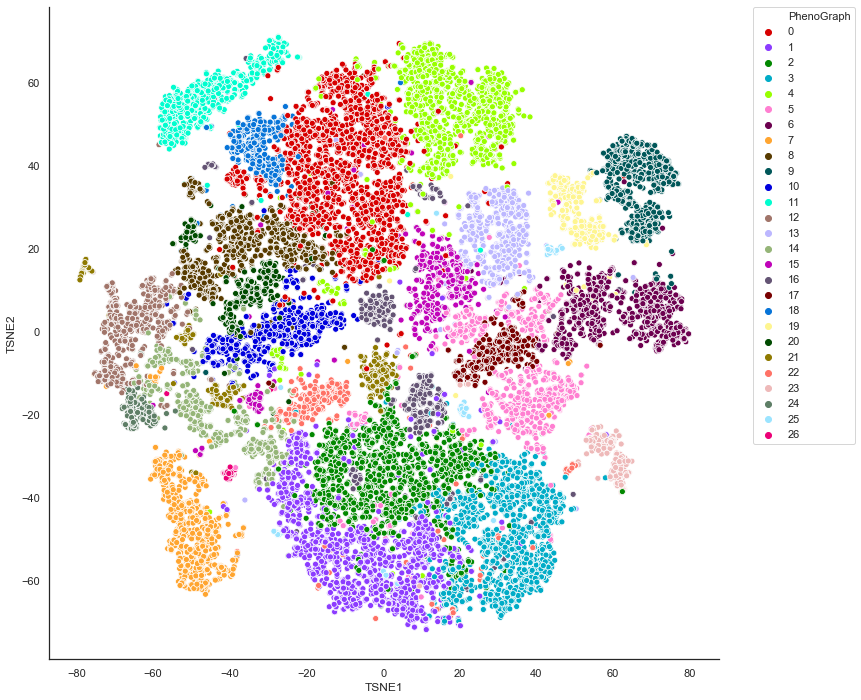

In [19]:
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(
    x="TSNE1", y="TSNE2", hue="PhenoGraph", 
    legend="full", palette=glasbey(int(clusters.nunique())),
    data=df,
    ax=ax
)
sns.despine()
# Move legend outside axis
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

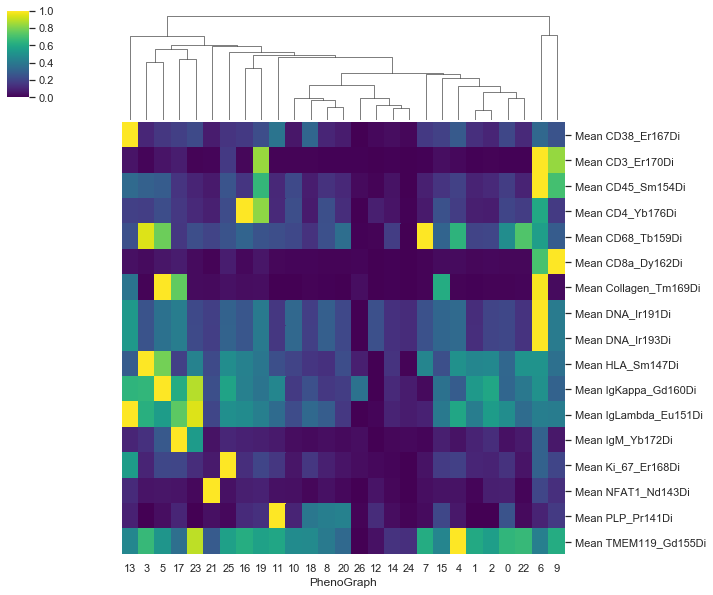

In [20]:
# Heatmap of intensities
heatmap = df.groupby(["PhenoGraph"]).mean().filter(like="Mean")
norm_heatmap = (heatmap - heatmap.min()) / (heatmap.quantile(q=0.99) - heatmap.min())
sns.clustermap(
    norm_heatmap.transpose(),
    row_cluster=False,  # Group by cluster
    #z_score=0,  # Standardize the rows using z-score normalization
    cmap="viridis", vmax=1,
)